
Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score. Para que seja possível implementar estas funções, você deve utilizar os métodos e suas fórmulas correspondentes (Tabela 1). 

Para a leitura dos valores de VP, VN, FP e FN, será necessário escolher uma matriz de confusão para a base dos cálculos. Essa matriz você pode escolher de forma arbitraria, pois nosso objetivo é entender como funciona cada métrica.  


In [ ]:
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
tensorflow_callback = tf.keras.callbacks.TensorBoard('./logs', histogram_freq=1)

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.fit(
    x=train_images,
    y=train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 127s 65ms/step - accuracy: 0.8935 - loss: 0.3345 - val_accuracy: 0.9844 - val_loss: 0.0493
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 185s 88ms/step - accuracy: 0.9850 - loss: 0.0500 - val_accuracy: 0.9872 - val_loss: 0.0390
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 164s 67ms/step - accuracy: 0.9901 - loss: 0.0325 - val_accuracy: 0.9858 - val_loss: 0.0438
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 126s 67ms/step - accuracy: 0.9914 - loss: 0.0253 - val_accuracy: 0.9906 - val_loss: 0.0340
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9921 - val_loss: 0.0306
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9911 - val_loss: 0.0375
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9962 - loss: 0.0109 - val_accuracy: 0.9915 - val_loss: 0.0293
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 113s 60ms/step - accuracy: 

In [19]:
y_true= test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step


In [21]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

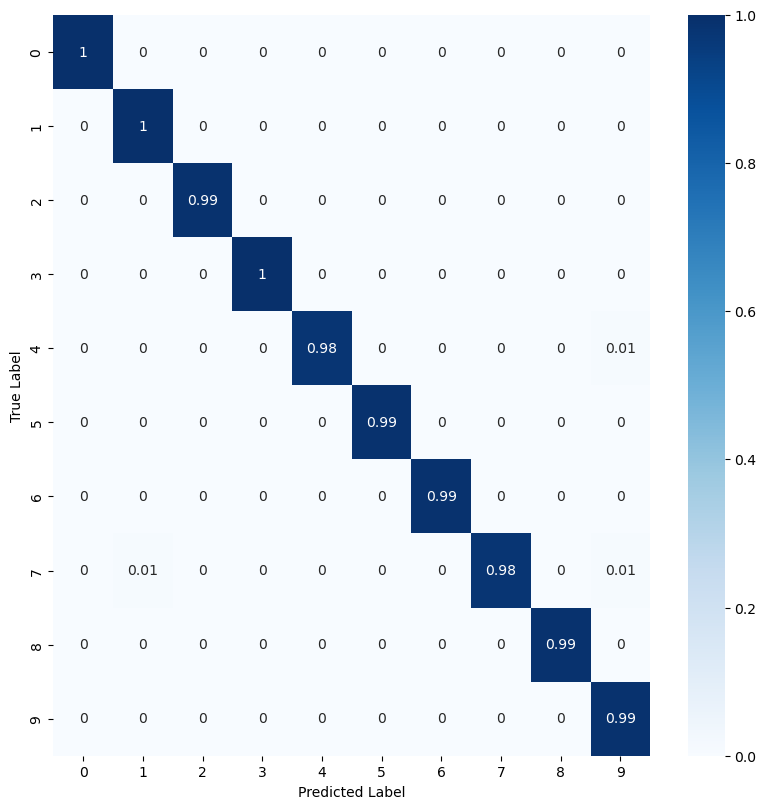

In [22]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [23]:

VP = []  # Verdadeiros Positivos
VN = []  # Verdadeiros Negativos
FP = []  # Falsos Positivos
FN = []  # Falsos Negativos

# Calculando métricas para cada classe
for c in range(len(classes)):
    vp = con_mat[c, c]  # Diagonal principal
    fp = sum(con_mat[:, c]) - vp  # Soma da coluna menos o VP
    fn = sum(con_mat[c, :]) - vp  # Soma da linha menos o VP
    vn = con_mat.sum() - (vp + fp + fn)  # Soma total menos os demais
    
    # Adicionando os valores para a classe
    VP.append(vp)
    VN.append(vn)
    FP.append(fp)
    FN.append(fn)

# Exibindo resultados
for i, c in enumerate(classes):
    print(f"Classe {c}: VP={VP[i]}, VN={VN[i]}, FP={FP[i]}, FN={FN[i]}")


# Consolidando os valores gerais
VP_total = sum(VP)
VN_total = sum(VN)
FP_total = sum(FP)
FN_total = sum(FN)

# Número total de exemplos
N = VP_total + VN_total + FP_total + FN_total

sensibilidade = VP_total / (VP_total + FN_total)
especificidade = VN_total / (VN_total + FP_total)
acuracia = (VP_total + VN_total) / N
precisao = VP_total / (VP_total + FP_total)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

# Exibindo os resultados
print(f"Sensibilidade: {sensibilidade:.4f}")
print(f"Especificidade: {especificidade:.4f}")
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"F-Score: {f_score:.4f}")

Classe 0: VP=977, VN=9016, FP=4, FN=3
Classe 1: VP=1134, VN=8851, FP=14, FN=1
Classe 2: VP=1024, VN=8964, FP=4, FN=8
Classe 3: VP=1007, VN=8983, FP=7, FN=3
Classe 4: VP=964, VN=9014, FP=4, FN=18
Classe 5: VP=883, VN=9098, FP=10, FN=9
Classe 6: VP=948, VN=9039, FP=3, FN=10
Classe 7: VP=1009, VN=8967, FP=5, FN=19
Classe 8: VP=966, VN=9016, FP=10, FN=8
Classe 9: VP=1003, VN=8967, FP=24, FN=6
Sensibilidade: 0.9915
Especificidade: 0.9991
Acurácia: 0.9983
Precisão: 0.9915
F-Score: 0.9915
